<center><h2>PART III and IV</h2></center>
<center><h3> Linear Regression </h3></center>

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.


Ram Chandra Bhavirisetty(50414405)<br>

<h3>Step-1: Import Libraries</h3>

In [1108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time

<h3> Step-2: Read, Preprocess the data and the Main Statistics </h3>

In [1109]:
data = pd.read_csv("~/documents/penguins.csv")

In [1110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [1111]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [1112]:
data.shape

(344, 8)

In [1113]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<h3> Data Cleaning </h3>

In [1114]:
data.drop(['year'],axis=1,inplace=True)
data[data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


<h3> Replaced Null values with median.</h3>

In [1002]:
med_2=data.iloc[:,2].median()
med_3=data.iloc[:,3].median()
med_4=data.iloc[:,4].median()
med_5=data.iloc[:,5].median()
mod_6=data.iloc[:,6].mode()

In [1003]:
value={'bill_length_mm':med_2,'bill_depth_mm':med_3,'flipper_length_mm':med_4,'body_mass_g':med_5}
data.iloc[[3,271],2:6]=data.iloc[[3,271],2:6].fillna(value=value)

In [1004]:
data[data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.80,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.80,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.50,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.50,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.20,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.30,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.50,15.7,217.0,4875.0,NaN


In [1005]:
data.loc[:,'sex']=data.loc[:,'sex'].fillna(value=mod_6[0])
data[data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


<h3> Step-3 Convert features with string data type to categorical and Normalize Categorical</h3>

In [1006]:
species=list(set(data['species']))
species_data=dict( zip(list(set(data['species'])),list(range(len(species))) ) )
island=list(set(data['island']))
island_data=dict( zip( list(set(data['island'])),list(range(len(island))) ) )
sex=list(set(data['sex']))
sex_data=dict( zip( list( set(data['sex']) ),list(range(len(sex))) ) )
species_data

{'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

In [1007]:
data.replace(species_data,inplace=True)
data.replace(island_data,inplace=True)
data.replace(sex_data,inplace=True)

<h3> Normalizing Non-Categorical Data</h3>

In [1008]:
for i in range(data.shape[1]):
    if i not in [0,1,6]:
        d=data.iloc[:,i]
        n=(d-min(d))
        m=(max(d)-min(d))
        data.iloc[:,i]=n/m

In [1009]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,1,0.254545,0.666667,0.152542,0.291667,1
1,0,1,0.269091,0.511905,0.237288,0.305556,0
2,0,1,0.298182,0.583333,0.389831,0.152778,0
3,0,1,0.449091,0.500000,0.423729,0.375000,1
4,0,1,0.167273,0.738095,0.355932,0.208333,0


<h3> Step-4: Feature selection using Correlation Graph.</h3>

Text(0.5, 1.0, 'heatMap')

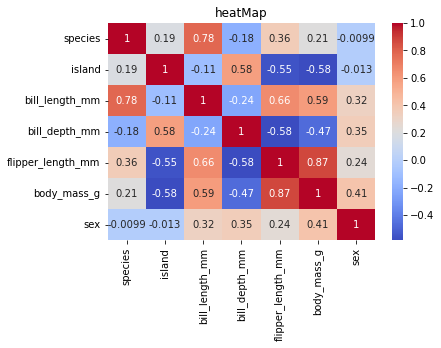

In [1010]:
data_corr=data.corr()
sb.heatmap(data_corr,annot=True,cmap="coolwarm")
plt.title("heatMap")

<h3>Visualizations for Features Vs Target</h3>

Text(0.5, 1.0, 'Flipper_length_mm Vs body_mass_g')

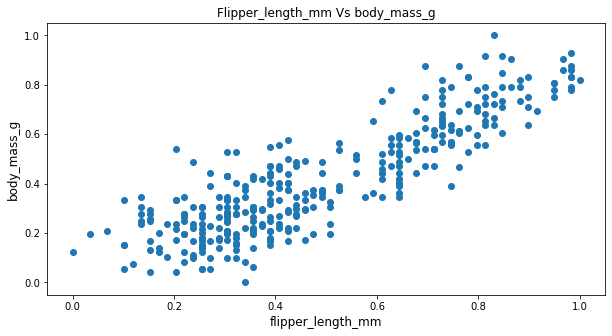

In [1011]:
fig=plt.figure(figsize=(10,5))
plt.scatter(data['flipper_length_mm'],data['body_mass_g'])
plt.xlabel('flipper_length_mm',fontsize=12)
plt.ylabel('body_mass_g',fontsize=12)
plt.title("Flipper_length_mm Vs body_mass_g")

Text(0.5, 1.0, 'bill_length_mm Vs body_mass_g')

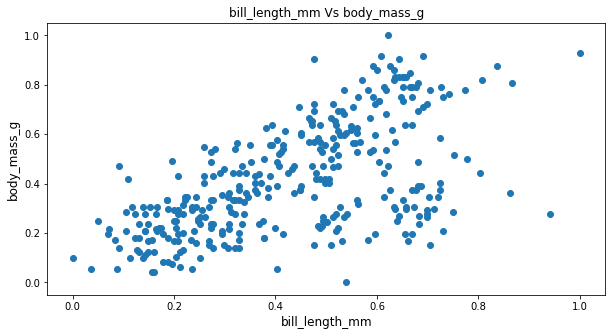

In [1012]:
fig=plt.figure(figsize=(10,5))
plt.scatter(data['bill_length_mm'],data['body_mass_g'])
plt.xlabel('bill_length_mm',fontsize=12)
plt.ylabel('body_mass_g',fontsize=12)
plt.title("bill_length_mm Vs body_mass_g")

Text(0.5, 1.0, 'sex Vs body_mass_g')

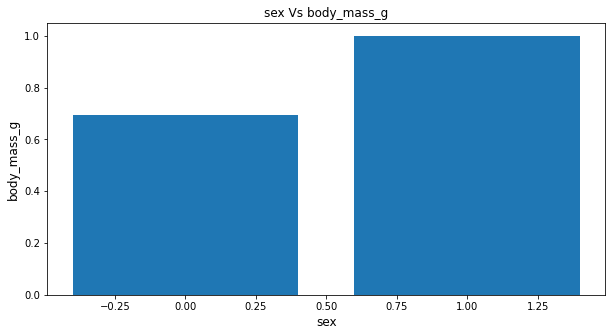

In [1013]:
fig=plt.figure(figsize=(10,5))
plt.bar(data['sex'],data['body_mass_g'])
plt.xlabel('sex',fontsize=12)
plt.ylabel('body_mass_g',fontsize=12)
plt.title("sex Vs body_mass_g")

Text(0.5, 1.0, 'bill_depth_mm Vs body_mass_g')

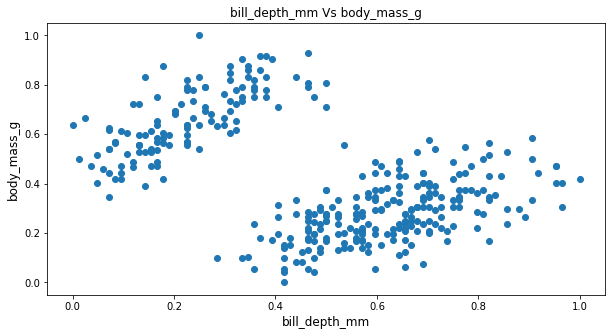

In [1014]:
fig=plt.figure(figsize=(10,5))
plt.scatter(data['bill_depth_mm'],data['body_mass_g'])
plt.xlabel('bill_depth_mm',fontsize=12)
plt.ylabel('body_mass_g',fontsize=12)
plt.title("bill_depth_mm Vs body_mass_g")

<h3> Concatenating initial weights column with the data </h3>

In [1072]:
p=np.ones((data.shape[0]))
p=pd.DataFrame(p)
p.columns=['w0']
data=pd.concat([p,data],axis=1)
data.head()

,w0,w0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,1.0,0,1,0.254545,0.666667,0.152542,0.291667,1
1,1.0,1.0,0,1,0.269091,0.511905,0.237288,0.305556,0
2,1.0,1.0,0,1,0.298182,0.583333,0.389831,0.152778,0
3,1.0,1.0,0,1,0.449091,0.500000,0.423729,0.375000,1
4,1.0,1.0,0,1,0.167273,0.738095,0.355932,0.208333,0


<h3> Step-5: Creating input_feature and Target Matrix</h3>

In [1016]:
X = data.loc[:,['w0','flipper_length_mm','bill_depth_mm','bill_length_mm','sex']]
coef = X.columns
X = np.array(X)
Y = data['body_mass_g']
Y = np.array(Y)
Y=Y.reshape((X.shape[0],1))

<h3> Step-6: Training and Test set (70 : 30)</h3>

In [1017]:
n=int(0.7*data.shape[0])
x_train,x_test,y_train,y_test=X[:n],X[n:],Y[:n],Y[n:]

<h3> Step-7: Print the shape of train and test sets.</h3>

In [1018]:
shape = pd.DataFrame({"x_train":[x_train.shape],"x_test":[x_test.shape],"y_train":[y_train.shape],"y_test":[y_test.shape]},index = ['Shape'])
shape.T.head()


,Shape
x_train,"(240, 5)"
x_test,"(104, 5)"
y_train,"(240, 1)"
y_test,"(104, 1)"


<h3> Step-8: Calculate the weights with Ordinary Least Squares (OLS).</h3>

In [1019]:
weights = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
coefs = weights
c = weights.T

In [1116]:
ols_w= pd.DataFrame(dict(zip(coef,*c)),index=['Weights']).T
ols_w.index = ['Intercept',*coef[1:]] 
print("Weights Vector: ",*c)
ols_w.head()

Weights Vector:  [-0.00221308  0.48974073 -0.02413134  0.4066759   0.10270879]


,Weights
Intercept,-0.002213
flipper_length_mm,0.489741
bill_depth_mm,-0.024131
bill_length_mm,0.406676
sex,0.102709


In [1049]:
w0,w1,w2,w3,w4=coefs[0],coefs[1],coefs[2],coefs[3],coefs[4]

<h3> Step-9: Get the Predictions with the Weights obtained and Mean Squared Errors(MSE). </h3>

In [1022]:
ypred_train_slr = w0 + w1*x_train[:,1]+ w2*x_train[:,2]+ w3*x_train[:,3]+ w4*x_train[:,4]
ypred_test_slr = w0 + w1*x_test[:,1]+ w2*x_test[:,2]+ w3*x_test[:,3]+w4*x_test[:,4]

In [1023]:
ols_mse_loss=(1/y_train.shape[0])*(np.sum((ypred_test_slr-y_test)**2))
print('Mean_Squared_Error(MSE):',ols_mse_loss)

Mean_Squared_Error(MSE): 3.984615031630877


<h3>Comparing Actual Vs Predictions</h3>

In [1024]:
y_t=y_train.reshape((y_train.shape[0],))
y_te=y_test.reshape((y_test.shape[0],))
train_compare = pd.DataFrame({'Train_Actual':y_t,'Train_preds':ypred_train_slr})
test_compare = pd.DataFrame({'Test_Actual':y_te,'Test_preds':ypred_test_slr})

In [1025]:
train_compare.head()

,Train_Actual,Train_preds
0,0.291667,0.262632
1,0.305556,0.211076
2,0.152778,0.295890
3,0.375000,0.478582
4,0.208333,0.222316


In [1026]:
test_compare.head()

,Test_Actual,Test_preds
0,0.604167,0.554968
1,0.791667,0.866496
2,0.625000,0.601899
3,0.750000,0.851086
4,0.569444,0.523955


<h3>Step-10 <br> <br>Prediction vs Training Graph</h3>

Text(0.5, 1.0, 'Train_Acutal vs Train_Predicted')

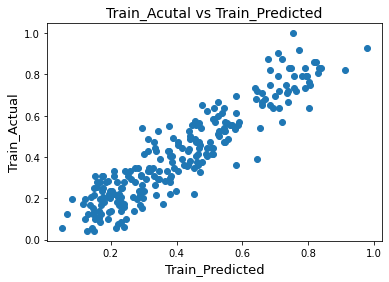

In [1027]:
plt.scatter(ypred_train_slr,y_train)
plt.xlabel("Train_Predicted",fontsize=13)
plt.ylabel("Train_Actual",fontsize=13)
plt.title("Train_Acutal vs Train_Predicted",fontsize=14)

<h3>Prediction Vs Testing Graph</h3>

Text(0.5, 1.0, 'Test_Actual vs Test_Predicted')

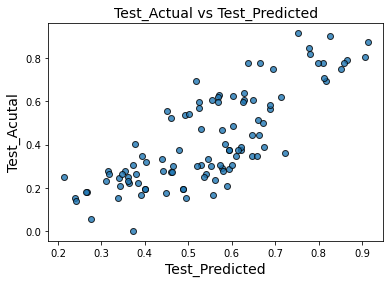

In [1028]:
plt.scatter(ypred_test_slr,y_test, alpha=0.8, edgecolors="black")
plt.xlabel("Test_Predicted",fontsize=14)
plt.ylabel("Test_Acutal",fontsize=14)
plt.title("Test_Actual vs Test_Predicted",fontsize=14)

<center><h2>PART-4</h2></center>
<center><h3> Ridge Regression</h3></center>
<p>Reusing Data from Part-3</p>
<p>Finding value of lambda which gives the lowest Loss.</p>

In [1090]:
loss=[]
for i in range(20):
    lam = i
    ridge_weights = np.linalg.inv(x_train.T.dot(x_train)+lam*np.identity(x_train.shape[1])).dot(x_train.T.dot(y_train))
    
    ridge_w = ridge_weights
    
    ridge_loss = (1/2)*np.sum( (y_test - x_test.dot(ridge_w)).T.dot((y_test - x_test.dot(ridge_w))) + (1/2)*lam*(ridge_w.T.dot(ridge_w)))
    loss.append(ridge_loss)
    
#list(zip(loss,list(range(20))))

<p> The absolute minimum  of the graph is the Optimal Lambda.</p>

Text(0.5, 1.0, 'Loss  Vs  Lambda')

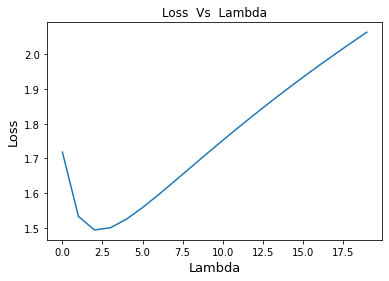

In [1091]:
plt.plot(list(range(20)),loss)
plt.xlabel("Lambda",fontsize=13)
plt.ylabel("Loss",fontsize = 13)
plt.title("Loss  Vs  Lambda")

<p> At the point 2 the graph started to increase so that is the value of lambda which is optimal and continue to rise over the next iterations.</p> 

<h3> Findng Optimal Weights at Lambda = 2 which obtained from graph above</h3>

In [1092]:
lam = 2
ridge_w = np.linalg.inv(x_train.T.dot(x_train)+lam*np.identity(x_train.shape[1])).dot(x_train.T.dot(y_train)).T
ridge_w
w0,w1,w2,w3,w4=ridge_w.T

ridge_loss_ = (1/2)*np.sum( (y_test - x_test.dot(ridge_w.T)).T.dot((y_test - x_test.dot(ridge_w.T))) + (1/2)*lam*(ridge_w.dot(ridge_w.T)))

ypred_test_ridge = w0 + w1*x_test[:,1]+ w2*x_test[:,2]+ w3*x_test[:,3]+w4*x_test[:,4] # y pred using optimal weights.
ypred_test_ridge = ypred_test_ridge.reshape((y_test.shape[0],1))

print('Ridge_loss with optimal weights: ',ridge_loss_)


Ridge_loss with optimal weights:  1.494923219297409


In [1117]:
ridge_= pd.DataFrame(dict(zip(coef,*ridge_w)),index=['Ridge Weights']).T
ridge_.index = ['Intercept',*coef[1:]] 
print("Weights Vector for Ridge Regression: ",*ridge_w)
ridge_.head()


Weights Vector for Ridge Regression:  [ 0.07473064  0.43210235 -0.09375357  0.3215537   0.12693212]


,Ridge Weights
Intercept,0.074731
flipper_length_mm,0.432102
bill_depth_mm,-0.093754
bill_length_mm,0.321554
sex,0.126932


In [1094]:
ols_w= pd.DataFrame(dict(zip(coef,*c)),index=['OLS Weights']).T
ols_w.index = ['Intercept',*coef[1:]] 
print("Weights: ",*c)
ols_w.head()

Weights:  [-0.00221308  0.48974073 -0.02413134  0.4066759   0.10270879]


,OLS Weights
Intercept,-0.002213
flipper_length_mm,0.489741
bill_depth_mm,-0.024131
bill_length_mm,0.406676
sex,0.102709


In [1095]:

ridge_loss_mse = (1/x_test.shape[0])*np.sum((ypred_test_ridge.T-y_test)**2)
loss_compare= pd.DataFrame(dict(zip(['OLS','RIDGE'],[ols_mse_loss,ridge_loss_mse])),index=['MSE']).T
loss_compare


,MSE
OLS,3.984615
RIDGE,8.338488


<h3> Actual Vs Predictions</h3>

In [1096]:
r_w0,r_w1,r_w2,r_w3,r_w4 = ridge_w.T
ridge_pred = r_w0 + r_w1*x_test[:,1]+ r_w2*x_test[:,2]+ r_w3*x_test[:,3]+ r_w4*x_test[:,4]

<h3>Comparing OLS Vs Ridge.</h3>

Text(0.5, 1.0, 'Test_Actual vs Test_Predicted')

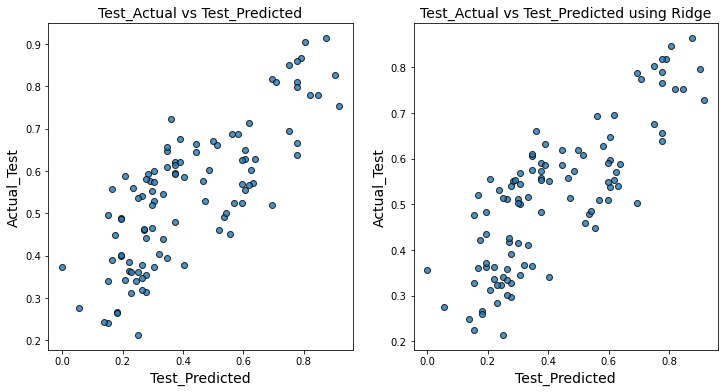

In [1097]:
fig,ax = plt.subplots(nrows = 1,ncols=2, figsize=(12, 6))

ax[1].scatter(y_test, ridge_pred, alpha=0.8, edgecolors="black")
ax[1].set_xlabel("Test_Predicted",fontsize=14)
ax[1].set_ylabel("Actual_Test",fontsize=14)
ax[1].set_title("Test_Actual vs Test_Predicted using Ridge",fontsize=14)


ax[0].scatter(y_test, ypred_test_slr, alpha=0.8, edgecolors="black")
ax[0].set_xlabel("Test_Predicted",fontsize=14)
ax[0].set_ylabel("Actual_Test",fontsize=14)
ax[0].set_title("Test_Actual vs Test_Predicted",fontsize=14)

<h3>Ridge Regression using Gradient Descent</h3>

In [1098]:
class ridgeregression():
    start = time.time()
    def __init__(self,iterations,alpha,learning_rate):
        self.iters = iterations
        self.alpha = alpha
        self.learning_rate = learning_rate
        
    def fit(self,x_train,y_train):
        loss=[]
        n=x_train.shape[0]
        b=0
        #weights=np.array([np.random.uniform(0, 1) for i in range(x_train.shape[1])]).reshape((1,x_train.shape[1]))
        weights=np.zeros((1,x_train.shape[1]))
        #print(weights,b)
        for i in range(self.iters):
            dw,db=self.gradient_descent(weights,x_train,y_train,n,b)
            weights=weights-(self.learning_rate*dw.T)
            b=b-self.learning_rate*db
            #print(b)
        return weights,b
    
        
    def gradient_descent(self,w,x,y,n,b):
        #print(w.shape,'deed',x.shape,'cfrv',y.shape)
        pred = y - x.dot(w.T)
        #print(pred.shape,x_t.shape,'pred')
        dw = -(x.T.dot(pred)) + self.alpha*w.T
        #print(pred,'dw')
        db = (1/n)*(np.sum(pred))
        #print(n)
        return dw,db
        
    def predict(self,x,w,b):
        y_pred = np.dot(w,x.T) + b
        return y_pred
    end=time.time()

In [1099]:

model_ridge = ridgeregression(100000,0.9,0.001)

train_start = time.time()
w,b = model_ridge.fit(x_train,y_train)
train_end = time.time()

predict_start = time.time()
pred_train = model_ridge.predict(x_train,w,b)
pred_test = model_ridge.predict(x_test,w,b)
predict_end = time.time()

print("training time: ",train_end-train_start)
print("predicting time: ",predict_end-predict_start)

training time:  1.3534331321716309
predicting time:  0.00011181831359863281


In [1100]:
mse=(1/y_test.shape[0])*(np.sum((pred_test-y_test)**2))
print('Mean_Square_Error(MSE): ',mse)

Mean_Square_Error(MSE):  8.34134538091466


In [1101]:
Weights= pd.DataFrame(dict(zip(coef,*w)),index=['Weights']).T
Weights.index = ['Intercept',*coef[1:]] 
print("weights ",*w)
print("Bias: ",b)
print("Mean Square Error (MSE): ",mse)
Weights.head()

weights  [ 0.04426086  0.45916822 -0.06974523  0.3539764   0.1180086 ]
Bias:  -0.016920996469272996
Mean Square Error (MSE):  8.34134538091466


,Weights
Intercept,0.044261
flipper_length_mm,0.459168
bill_depth_mm,-0.069745
bill_length_mm,0.353976
sex,0.118009


<h3>Finding results using In-built Ridge function</h3>

In [1102]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
clf = Ridge(alpha=0.9)
clf.fit(x_train,y_train)
p = clf.predict(x_test)
p_train = pd.DataFrame(clf.predict(x_train))
p = pd.DataFrame(p)
pred_ = pd.DataFrame(pred.T)

train_loss_inbuilt = ((p_train-y_train)**2).sum()
train_loss_ = ((pred_train-y_train)**2).sum()

loss_inbuilt = ((p-y_test)**2).sum()
loss_ = ((pred_-y_test)**2).sum()


<h3>Comparing results</h3>

In [1103]:
pd.DataFrame({'Train_Preds (inbuilt)':p_train.iloc[:,0],'Train_Preds':pred_train[0]})

,Train_Preds (inbuilt),Train_Preds
0,0.276841,0.258997
1,0.213133,0.195844
2,0.287638,0.271202
3,0.481339,0.464006
4,0.214647,0.198505
...,...,...
235,0.773450,0.757197
236,0.515073,0.497588
237,0.802210,0.787000
238,0.536981,0.519994


In [1104]:
pd.DataFrame({'Test_Pred (inbuilt)':p.iloc[:,0],'Test_Pred':pred_.iloc[:,0]})

,Test_Pred (inbuilt),Test_Pred
0,0.546536,0.529394
1,0.836948,0.821790
2,0.584076,0.567787
3,0.821876,0.806682
4,0.516544,0.499499
...,...,...
99,0.681607,0.667170
100,0.381782,0.366040
101,0.508270,0.491694
102,0.647976,0.632800


In [1105]:

print("Train Loss with Gradient Descent function: ",train_loss_)
print("Train Loss with Inbuilt function: ",train_loss_inbuilt[0])


Train Loss with Gradient Descent function:  5209.900847540625
Train Loss with Inbuilt function:  1.8276016196169123


In [1106]:

print("Test Loss with Gradient Descent function: ",loss_[0])
print("Test Loss with Inbuilt function: ",loss_inbuilt[0])


Test Loss with Gradient Descent function:  2.578157479193737
Test Loss with Inbuilt function:  2.8972145798913234


<h3> Comapring Loss For OLS, Ridge, Ridge_usiing_Gradient_Descent</h3>

In [1107]:

final_loss_compare= pd.DataFrame(dict(zip(['OLS','RIDGE','RIDGE_GD'],[ols_mse_loss,ridge_loss_mse,mse])),index=['MSE']).T
final_loss_compare



,MSE
OLS,3.984615
RIDGE,8.338488
RIDGE_GD,8.341345


<h3>References</h3>

1. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
2. https://www.geeksforgeeks.org/python-pandas-dataframe/
3. https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8
4. https://pbpython.com/dataframe-gui-overview.html
5. https://www.geeksforgeeks.org/how-to-check-the-execution-time-of-python-script/